<a href="https://colab.research.google.com/github/CaioEnzo23/MODELAGEM-DO-CONSUMO-DE-ENERGIA-NO-BRASIL/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Setup**

Importação das principais bilbiotecas ultilizadas

In [ ]:
# Carregamento e manipulação dos dados
import pandas as pd
import numpy as np

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Preparação dos dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Modelos de aprendizado de máquina
# Classificação
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Regressão
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Avaliação de modelos
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Instalação de dependências (caso necessário)
!pip install -U kaleido

print("Todas as bibliotecas foram importadas com sucesso!")

Todas as bibliotecas foram importadas com sucesso!


Carregue a base de dados.

In [ ]:
df = pd.read_excel("/content/Dados_abertos_Consumo_Mensal (1).xlsx")

In [ ]:
df

#**Pré-processamento dos dados**

Identificação de Linhas e Colunas

In [ ]:
df.shape

(17210, 8)

Identificar informações do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17210 entries, 0 to 17209
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data            17210 non-null  int64         
 1   DataExcel       17210 non-null  datetime64[ns]
 2   Regiao          17210 non-null  object        
 3   Sistema         17210 non-null  object        
 4   Classe          17210 non-null  object        
 5   TipoConsumidor  17210 non-null  object        
 6   Consumo         17210 non-null  float64       
 7   Consumidores    17210 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.1+ MB


Realize uma descrição estatística dos dados

In [ ]:
descricao = df.describe()
print(descricao)

               Data                      DataExcel       Consumo  Consumidores
count  1.721000e+04                          17210  1.721000e+04  1.721000e+04
mean   2.014802e+07  2015-03-12 09:01:06.519465728  5.463146e+05  1.098572e+06
min    2.004010e+07            2004-01-01 00:00:00 -2.210000e+02  0.000000e+00
25%    2.010040e+07            2010-04-01 00:00:00  1.228677e+04  1.250000e+02
50%    2.015080e+07            2015-08-01 00:00:00  1.232835e+05  1.544800e+04
75%    2.020050e+07            2020-05-01 00:00:00  5.758829e+05  2.479092e+05
max    2.025010e+07            2025-01-01 00:00:00  8.227587e+06  3.655221e+07
std    5.973415e+04                            NaN  1.077386e+06  4.165227e+06


Visualiza as distribuições e identifica a relevância das colunas para a análise

In [ ]:
print("Primeiras linhas do DataFrame:")
print(df.head())

Primeiras linhas do DataFrame:
       Data  DataExcel        Regiao                   Sistema      Classe  \
0  20250101 2025-01-01  Centro-Oeste  SUDESTE / CENTRO - OESTE   Comercial   
1  20250101 2025-01-01  Centro-Oeste  SUDESTE / CENTRO - OESTE   Comercial   
2  20250101 2025-01-01  Centro-Oeste  SUDESTE / CENTRO - OESTE  Industrial   
3  20250101 2025-01-01  Centro-Oeste  SUDESTE / CENTRO - OESTE  Industrial   
4  20250101 2025-01-01  Centro-Oeste  SUDESTE / CENTRO - OESTE      Outros   

  TipoConsumidor     Consumo  Consumidores  
0         Cativo  402738.592        498732  
1          Livre  236163.143          2911  
2         Cativo   56632.217         30461  
3          Livre  862334.341          1127  
4         Cativo  327246.936         64219  


Quantidade de registros de cada região

In [ ]:
df["Regiao"].value_counts()

,count
Regiao,
Nordeste,5099
Norte,4560
Centro-Oeste,3187
Sudeste,2243
Sul,2121


Distribuições dos valores Númericos (Data, DataExcel, Consumo, Consumidores)

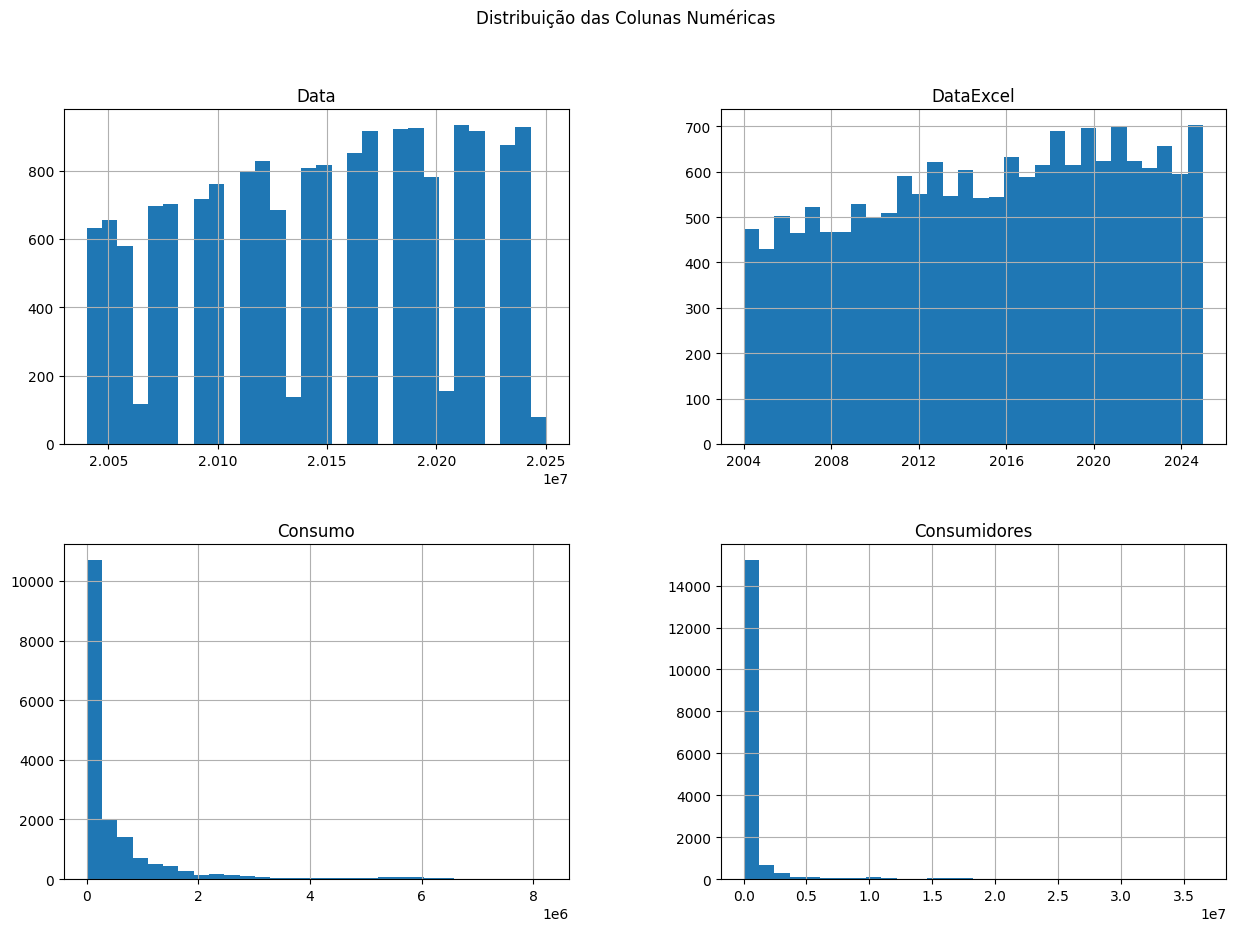

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribuição das Colunas Numéricas')
plt.show()

Verifica a presença de dados nulos, duplicados, outliers e demais inconsistências
nos dados

In [ ]:
print("\nDados Nulos por Coluna:")
print(df.isnull().sum())


Dados Nulos por Coluna:
Data              0
DataExcel         0
Regiao            0
Sistema           0
Classe            0
TipoConsumidor    0
Consumo           0
Consumidores      0
dtype: int64


Verifica linhas duplicados

In [ ]:
print("\nNúmero de Linhas Duplicadas:")
print(df.duplicated().sum())


Número de Linhas Duplicadas:
0


Tratando os tipos de dados

Dados do tipo float não tem boa performance nos modelos, logo precisamos trata-los para int. Temos apenas os dados de Consumo como float.

In [ ]:
df["Consumo"] = df["Consumo"].astype(int)

In [ ]:
df.dtypes

,0
Data,int64
DataExcel,datetime64[ns]
Regiao,object
Sistema,object
Classe,object
TipoConsumidor,object
Consumo,int64
Consumidores,int64


In [ ]:
df

,Data,DataExcel,Regiao,Sistema,Classe,TipoConsumidor,Consumo,Consumidores
0,20250101,2025-01-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Comercial,Cativo,402738,498732
1,20250101,2025-01-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Comercial,Livre,236163,2911
2,20250101,2025-01-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Industrial,Cativo,56632,30461
3,20250101,2025-01-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Industrial,Livre,862334,1127
4,20250101,2025-01-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Outros,Cativo,327246,64219
...,...,...,...,...,...,...,...,...
17205,20040101,2004-01-01,Sul,SUL,Industrial,Cativo,1464696,159190
17206,20040101,2004-01-01,Sul,SUL,Industrial,Livre,346283,42
17207,20040101,2004-01-01,Sul,SUL,Outros,Cativo,373249,84291
17208,20040101,2004-01-01,Sul,SUL,Residencial,Cativo,1132506,6762504


Criação da coluna Mês. Importante para termos a visualização mais detalhada do passar do tempo nos nossos dados.

In [ ]:
df["Mes"] = df["DataExcel"].dt.month

In [ ]:
df

,Data,DataExcel,Regiao,Sistema,Classe,TipoConsumidor,Consumo,Consumidores,Mes
0,20250101,2025-01-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Comercial,Cativo,402738,498732,1
1,20250101,2025-01-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Comercial,Livre,236163,2911,1
2,20250101,2025-01-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Industrial,Cativo,56632,30461,1
3,20250101,2025-01-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Industrial,Livre,862334,1127,1
4,20250101,2025-01-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Outros,Cativo,327246,64219,1
...,...,...,...,...,...,...,...,...,...
17205,20040101,2004-01-01,Sul,SUL,Industrial,Cativo,1464696,159190,1
17206,20040101,2004-01-01,Sul,SUL,Industrial,Livre,346283,42,1
17207,20040101,2004-01-01,Sul,SUL,Outros,Cativo,373249,84291,1
17208,20040101,2004-01-01,Sul,SUL,Residencial,Cativo,1132506,6762504,1


#**Análise exploratória dos dados**

**Plotagem de gráficos para análise**

Iniciamos usando um Histograma para ver como está distribuido cada classe de consumidores.

Onde podemos ver que as duas classes com mais registros são industrial e comercial, e a classe com menos registros é residencial.

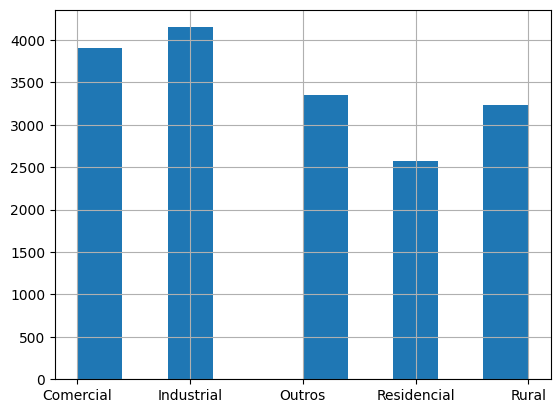

In [ ]:
df['Classe'].hist(bins=10);

Depois ainda usando o Histograma, verificamos a distribuição entre as regiões.

Vemos que a região com mais registros são as regiões Norte e Nordeste, e as com menos registros são as Sul e Sudeste.

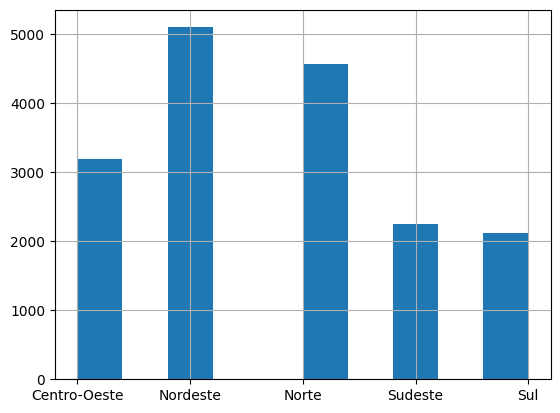

In [ ]:
df['Regiao'].hist(bins=10);

Por último verificamos a distribuição de registros por tipo de consumidor.

Sendo um consumidor cativo aquele que não tem liberdade de selecionar o seu fornecedor de energia, e o livre tem a possibilidade de escolher.

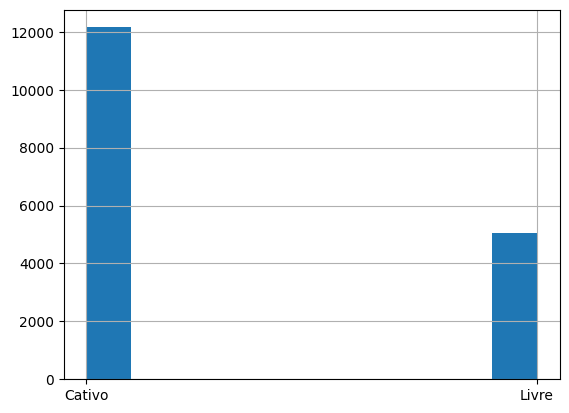

In [ ]:
df['TipoConsumidor'].hist(bins=10);

Mais importante do que os registros, temos que saber como o consumo em si é distribuido, para isso começamos montando gráficos de barra do consumo sobre o tipo de consumidor.

Conforme o Gráfico vemos que o consumo cativo é o maior que o livre.

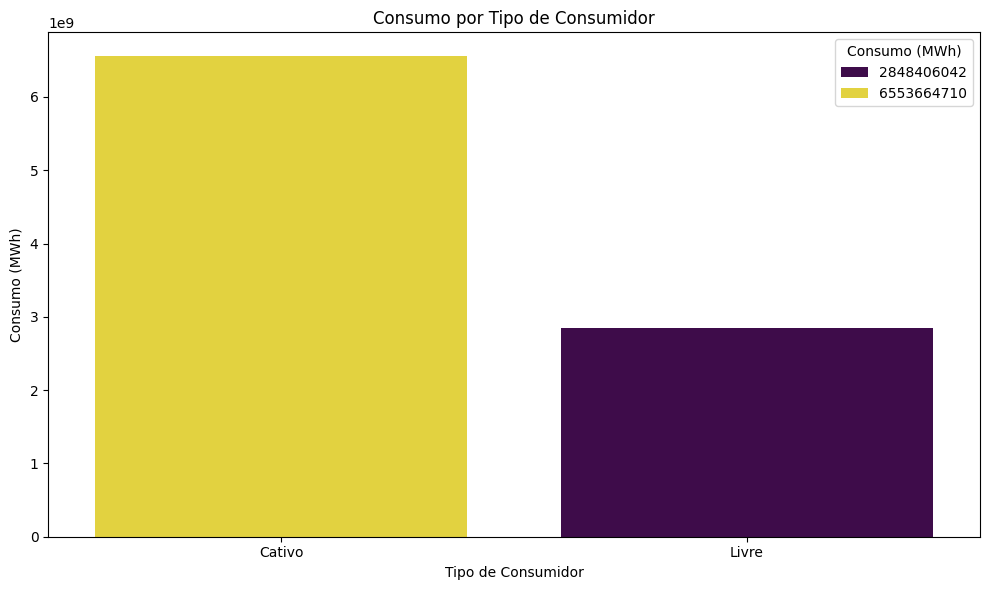

In [ ]:
# Agrupar os dados por região e somar o consumo
consumo_por_tipo_consumidor = df.groupby('TipoConsumidor')['Consumo'].sum()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=consumo_por_tipo_consumidor.index, y=consumo_por_tipo_consumidor.values, hue=consumo_por_tipo_consumidor, palette='viridis')
plt.title('Consumo por Tipo de Consumidor')
plt.xlabel('Tipo de Consumidor')
plt.ylabel('Consumo (MWh)')
plt.legend(title='Consumo (MWh)', loc='upper right')
plt.tight_layout()
plt.show()

Fazendo o mesmo para a região, nesse caso foi necessário agrupar os dados para cada região, temos um resultado diferente do número de registros.


Mesmo tendo pouco registros, a região sudeste teve um valor de consumo muito maior do que as outras regiões.

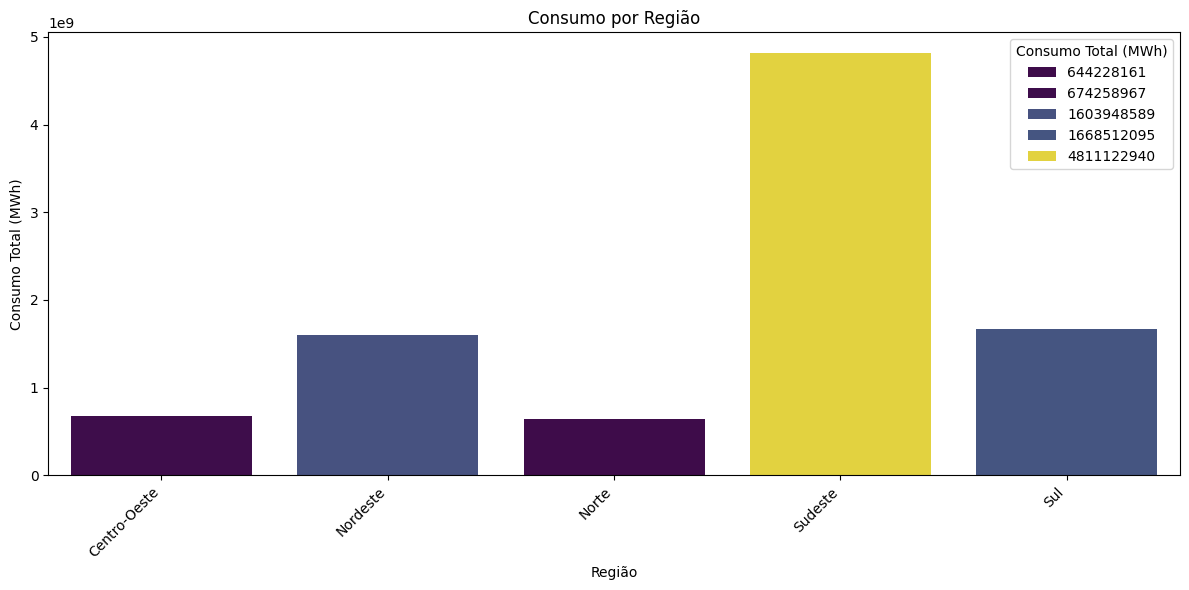

In [ ]:
# Agrupar os dados por região e somar o consumo
consumo_por_regiao = df.groupby('Regiao')['Consumo'].sum()

# Criar o gráfico de barras com cores diferentes para cada região
plt.figure(figsize=(12, 6))
sns.barplot(x=consumo_por_regiao.index, y=consumo_por_regiao.values, hue=consumo_por_regiao, palette='viridis')
plt.title('Consumo por Região')
plt.xlabel('Região')
plt.ylabel('Consumo Total (MWh)')
plt.legend(title='Consumo Total (MWh)', loc='upper right')
plt.xticks(rotation=45, ha='right') # Rotacionar rótulos do eixo x para melhor legibilidade
plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show()

Resolvemos fazer uma análise temporal do consumo por região ao longo do tempo.

Como podemos ver, a região Sudeste foi desde o começo da análise a região com mais consumo.

Além disso vemos que não teve grandes alterações no nível de consumo de cada região no período analisado.

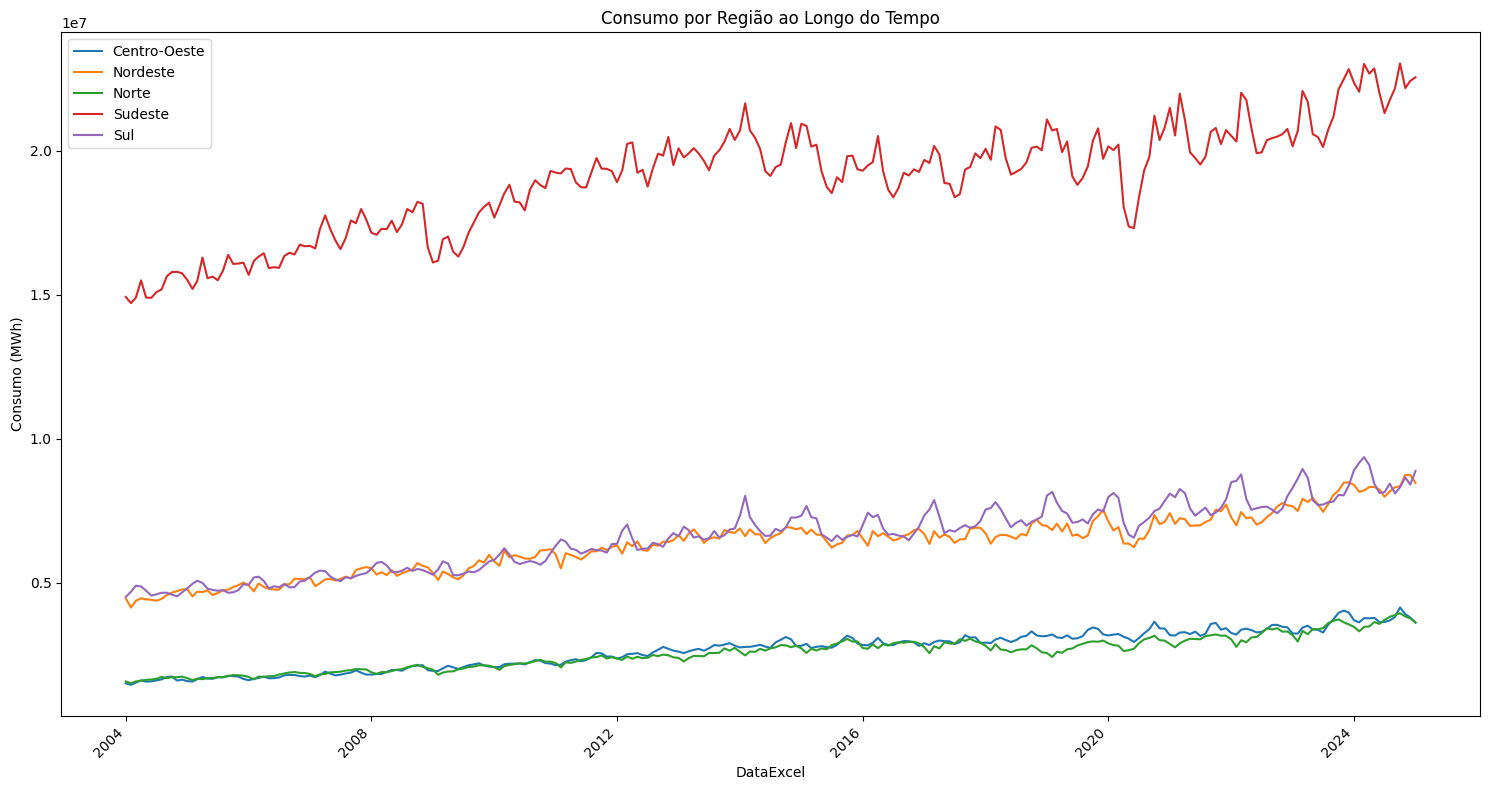

In [ ]:
# Criando a série temporal
consumo_por_regiao_e_data = df.groupby(['DataExcel', 'Regiao'])['Consumo'].sum().reset_index()

# Criando o gráfico de linhas para visualizar a série temporal
plt.figure(figsize=(15, 8))
for regiao in consumo_por_regiao_e_data['Regiao'].unique():
  subset = consumo_por_regiao_e_data[consumo_por_regiao_e_data['Regiao'] == regiao]
  plt.plot(subset['DataExcel'], subset['Consumo'], label=regiao)

plt.title('Consumo por Região ao Longo do Tempo')
plt.xlabel('DataExcel')
plt.ylabel('Consumo (MWh)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Da mesma forma que fizemos com as regiões resolvemos fazer também com as Classes de cada consumidor.

E vemos um notável aumento no consumo da classe residencial, mesmo lembrando que ela foi a classe com menos registros no nosso estudo.

Logo vemos um aumento temporal notável em cada registro da classe residencial.

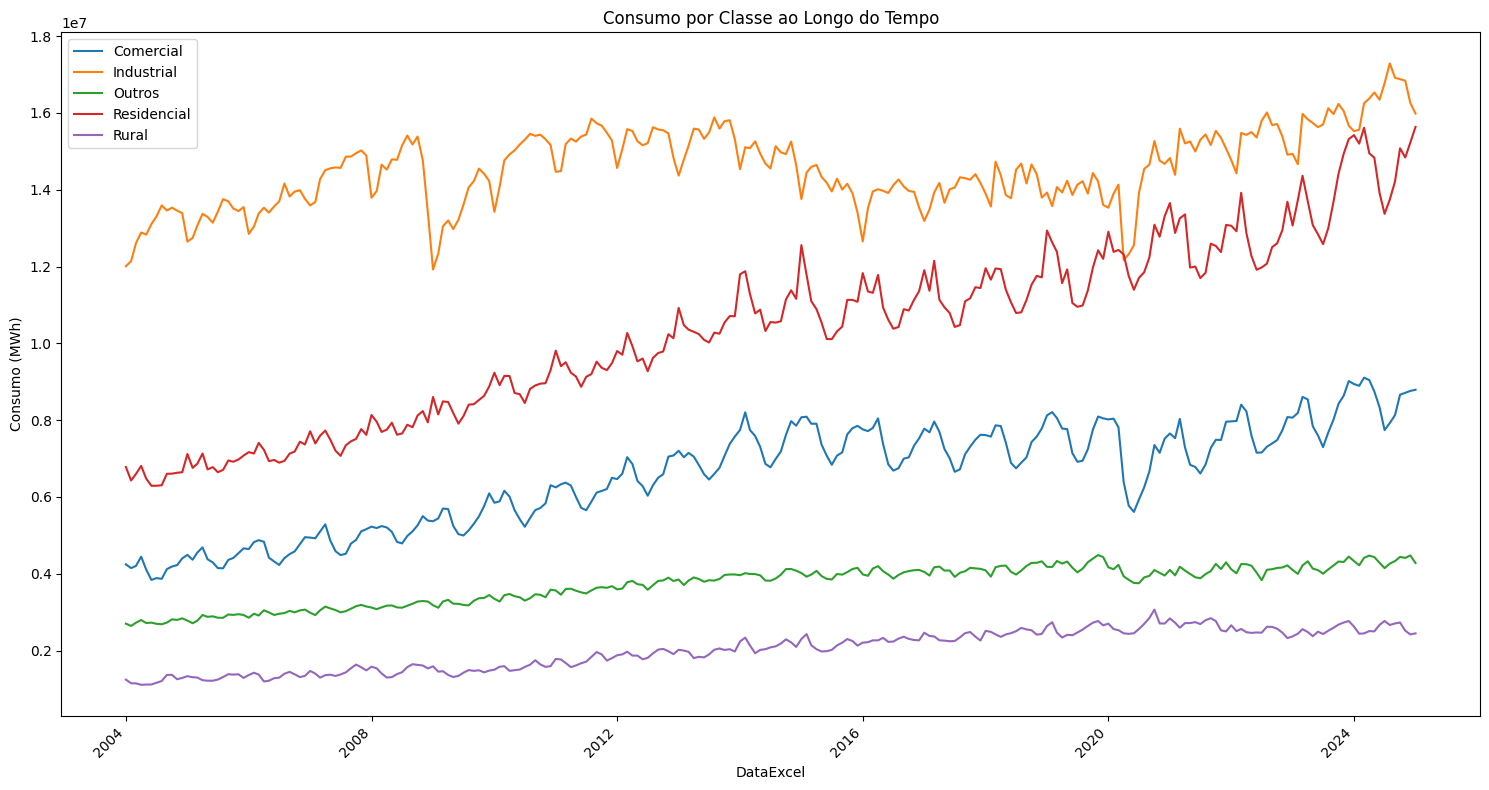

In [ ]:
# Criando a série temporal
consumo_por_classe_e_data = df.groupby(['DataExcel', 'Classe'])['Consumo'].sum().reset_index()

# Criando o gráfico de linhas para visualizar a série temporal
plt.figure(figsize=(15, 8))
for classe in consumo_por_classe_e_data['Classe'].unique():
  subset = consumo_por_classe_e_data[consumo_por_classe_e_data['Classe'] == classe]
  plt.plot(subset['DataExcel'], subset['Consumo'], label=classe)

plt.title('Consumo por Classe ao Longo do Tempo')
plt.xlabel('DataExcel')
plt.ylabel('Consumo (MWh)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Com isso em mente, decidimos realizar a mesma análise mas apenas para os dados dos tipo de consumidores cativos.

Isolamos todos os registros Cativos e fizemos o mesmo teste.

Na análise percebemos a grande queda do regime Cativo na Classe Industrial. E uma certa estabilidade na distribuição de cada outra classe. Em destaque a classe Residencial que tem grande parte dela sendo de regime cativo.

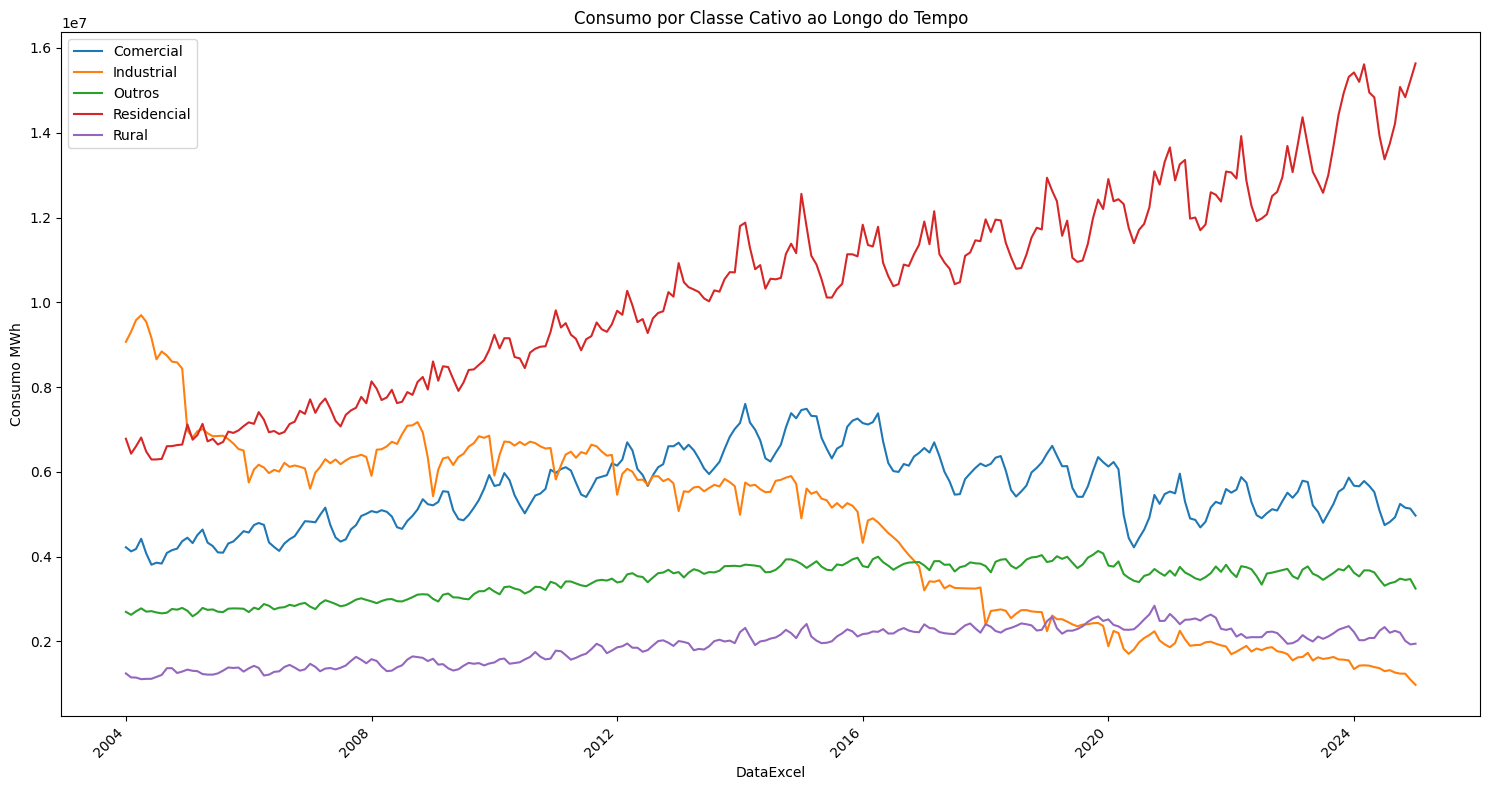

In [ ]:
# Filtrando o DataFrame para incluir apenas o tipo de consumo 'Cativo'
df_cativo = df[df['TipoConsumidor'] == 'Cativo']

# Criando a série temporal para o consumo cativo
consumo_por_classe_e_data = df_cativo.groupby(['DataExcel', 'Classe'])['Consumo'].sum().reset_index()

# Criando o gráfico de linhas para visualizar a série temporal
plt.figure(figsize=(15, 8))
for classe in consumo_por_classe_e_data['Classe'].unique():
  subset = consumo_por_classe_e_data[consumo_por_classe_e_data['Classe'] == classe]
  plt.plot(subset['DataExcel'], subset['Consumo'], label=classe)

plt.title('Consumo por Classe Cativo ao Longo do Tempo')
plt.xlabel('DataExcel')
plt.ylabel('Consumo MWh')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig("consumo_cativo.png", dpi=300, bbox_inches='tight')
plt.show()

Para verificar se a queda dos tipos de consumidores cativos da classe industrial realizaram uma migração para tipos livres, ou simplesmente diminuiram a quantidade de consumo dessa classe, fazemos o mesmo agrupamento anterior mas usando apenas tipos de consumidores livres, e com esses dados podems ver o aumento dos tipos de consumidores livres da classe industrial.

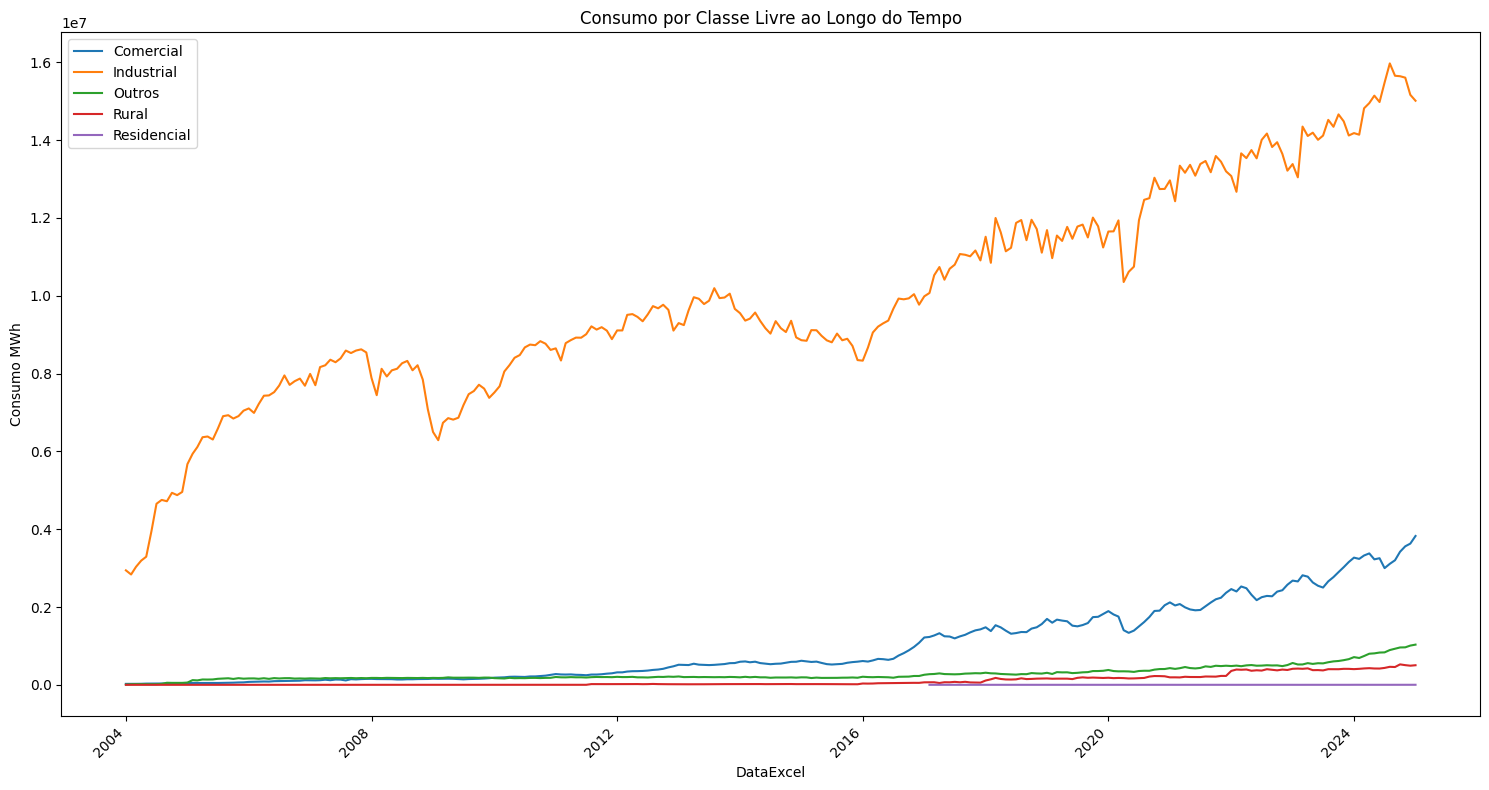

In [ ]:
# Filtrando o DataFrame para incluir apenas o tipo de consumo 'Livre'
df_livre = df[df['TipoConsumidor'] == 'Livre']

consumo_por_classe_e_data = df_livre.groupby(['DataExcel', 'Classe'])['Consumo'].sum().reset_index()

# Criando o gráfico de linhas para visualizar a série temporal
plt.figure(figsize=(15, 8))
for classe in consumo_por_classe_e_data['Classe'].unique():
  subset = consumo_por_classe_e_data[consumo_por_classe_e_data['Classe'] == classe]
  plt.plot(subset['DataExcel'], subset['Consumo'], label=classe)

plt.title('Consumo por Classe Livre ao Longo do Tempo')
plt.xlabel('DataExcel')
plt.ylabel('Consumo MWh')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#**Estruturação do Modelo**

Antes de montar nossos modelos em si, temos que transformar as nossas variáveis categoricas em valores númericos.

Como as variáveis já tem valores conhecidos optamos por usar o get_dummies para a transformação das variáveis.

In [ ]:
df_encoded = pd.get_dummies(df, columns=["Regiao", "Sistema", "Classe", "TipoConsumidor"])

Definimos variáveis de entrada (X) e saída (Y)

In [ ]:
X = df_encoded[[col for col in df_encoded.columns if col.startswith(('Regiao', 'Sistema', 'Classe', 'TipoConsumidor')) or col == 'DataExcel']]
Y = df["Consumo"]

Transformamos os dados da Data em inteiros também para trabalhar esses dados nos nossos modelos.

In [ ]:
X['DataExcel'] = pd.to_datetime(X['DataExcel']).apply(lambda date: date.toordinal())

<ipython-input-35-a341a8405060>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DataExcel'] = pd.to_datetime(X['DataExcel']).apply(lambda date: date.toordinal())


Dividimos os dados em treino e teste

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Resolvemos adotar 3 modelos de predição:

- Random Forest
- Regressão Linear
- Árvore de Decisão

Começamos treinando o modelo de random forest

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

Fazendo previsões

In [ ]:
y_pred_random = model.predict(X_test)

Avaliando o modelo

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_random))
r2 = r2_score(Y_test, y_pred_random)

print(f"Random Forest - RMSE: {rmse}")
print(f"Random Forest - R²: {r2}")

Random Forest - RMSE: 50307.27216526762
Random Forest - R²: 0.9978219342113581


Agora indo para Árvore de Decisão

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

Fazendo a predição

In [ ]:
y_pred_tree = dt.predict(X_test)
y_pred_tree

array([ 215648., 1509789.,  661217., ..., 1961107.,    2198.,  189662.])

Avaliando a Árvore de Decisão

In [ ]:
rmse_tree = np.sqrt(mean_squared_error(Y_test, y_pred_tree))
r2_tree = r2_score(Y_test, y_pred_tree)
print(f"Árvore de Decisão - RMSE: {rmse_tree}")
print(f"Árvore de Decisão - R²: {r2}")

Árvore de Decisão - RMSE: 56535.74429349871
Árvore de Decisão - R²: 0.9978219342113581


Treinando a Regressão Linear

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

Fazendo a predição

In [ ]:
y_pred_linear = linear_model.predict(X_test)
y_pred_linear

array([ 615025.33026979, 1241913.673679  ,  475077.93554329, ...,
       1047424.68099198, -332580.95288026,  384874.3002114 ])

Avaliando a Regressão Linear

In [ ]:
rmse_linear = np.sqrt(mean_squared_error(Y_test, y_pred_linear))
r2_linear = r2_score(Y_test, y_pred_linear)
print(f"Regressão Linear - RMSE: {rmse_linear}")
print(f"Regressão Linear - R²: {r2_linear}")

Regressão Linear - RMSE: 767375.5205530863
Regressão Linear - R²: 0.4932131498755141


#**Construção dos Resultados**

Para ter uma visualização melhor da perfomance montamos scatterplot para cada modelo, comparando o dado real do predito

Começando com o Random Forest temos o seguinte gráfico

In [ ]:
px.scatter(x=Y_test, y=y_pred_random, title= "Real X predito", trendline="ols", labels={"x":"Real", "y":"Previsto"})

Agora indo para a Regressão Linear

In [ ]:
px.scatter(x=Y_test, y=y_pred_linear, title= "Real X predito", trendline="ols", labels={"x":"Real", "y":"Previsto"})

E por último testando a Árvore de Decisão

In [ ]:
px.scatter(x=Y_test, y=y_pred_tree, title= "Real X predito", trendline="ols", labels={"x":"Real", "y":"Previsto"})

Tabela dos Resultados

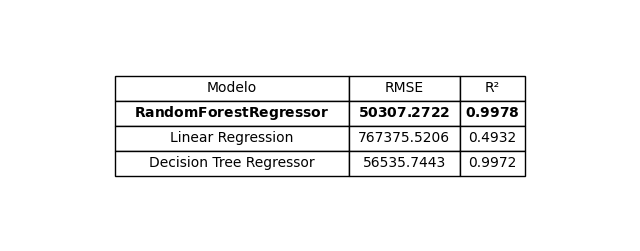

In [ ]:
# Criar o DataFrame com os modelos ajustados
data = {'Modelo': ['Random Forest Regressor', 'Linear Regression', 'Decision Tree Regressor'],
        'RMSE': [rmse, rmse_linear, np.sqrt(mean_squared_error(Y_test, y_pred_tree))],
        'R²': [r2, r2_linear, r2_score(Y_test, y_pred_tree)]}
df_modelos = pd.DataFrame(data)

# Encontrando o melhor modelo para cada métrica
best_rmse_model = df_modelos.loc[df_modelos['RMSE'].idxmin()]
best_r2_model = df_modelos.loc[df_modelos['R²'].idxmax()]

# Formatando os melhores resultados em negrito
def format_table(df_results):
    formatted_data = []
    for _, row in df_results.iterrows():
        formatted_row = []
        for col in df_results.columns:
            value = row[col]
            if row['Modelo'] == best_rmse_model['Modelo'] or row['Modelo'] == best_r2_model['Modelo']:
                if col in ['RMSE', 'R²']:
                    formatted_row.append(f"$\\bf{{{value:.4f}}}$")  # Negrito para valores numéricos
                else:
                    formatted_row.append(f"$\\bf{{{value}}}$")  # Negrito para texto
            else:
                if col in ['RMSE', 'R²']:
                    formatted_row.append(f"{value:.4f}")  # Formatação numérica padrão
                else:
                    formatted_row.append(str(value))
        formatted_data.append(formatted_row)
    return formatted_data

# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(8, 3))

# Ocultar eixos
ax.axis('off')

# Criar a tabela com os nomes ajustados
tabela = ax.table(cellText=format_table(df_modelos),
                  colLabels=df_modelos.columns,
                  cellLoc='center',
                  loc='center')

# Ajustar estilo
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.auto_set_column_width([0, 1, 2])

# Ajustar escala para melhor exibição
tabela.scale(1.5, 1.5)

# Salvar como PNG
plt.savefig("tabela.png", dpi=300, bbox_inches='tight')

# Exibir a imagem
plt.show()

Avaliação dos Resultados

**RMSE (Root Mean Square Error):**

O RMSE é uma métrica que mede o erro médio entre os valores preditos pelo modelo (Y_pred) e os valores reais (Y_test). Um RMSE de 46.238 indica que, em média, o modelo está errando a previsão do consumo por cerca de 46.238 unidades. Quanto menor o RMSE, melhor o desempenho do modelo, pois isso significa que o erro médio está mais próximo de zero.

**R² (Coeficiente de Determinação):**

O R² mede o quanto o modelo consegue explicar a variância dos dados. Ele varia de 0 a 1, onde:
- 0 significa que o modelo não explica nada dos dados.
- 1 significa que o modelo explica 100% da variância nos dados.

Um valor de 0.998 indica que o modelo explica quase toda a variância dos dados (99.8%). Isso é excelente, sugerindo que o modelo está fazendo previsões bastante precisas.